In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

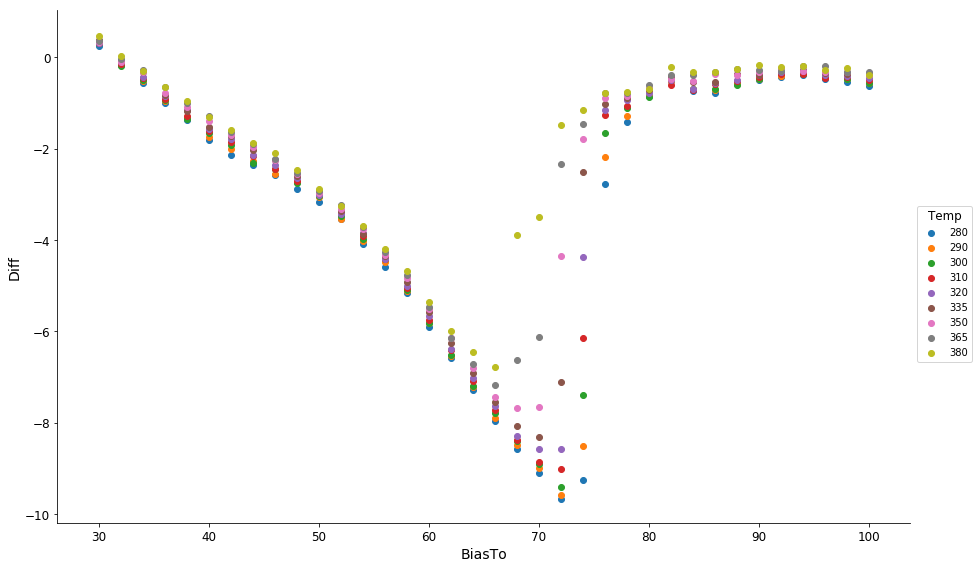

In [85]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/fourth/force_0.04_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_0_20_Apr_001224.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun0 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

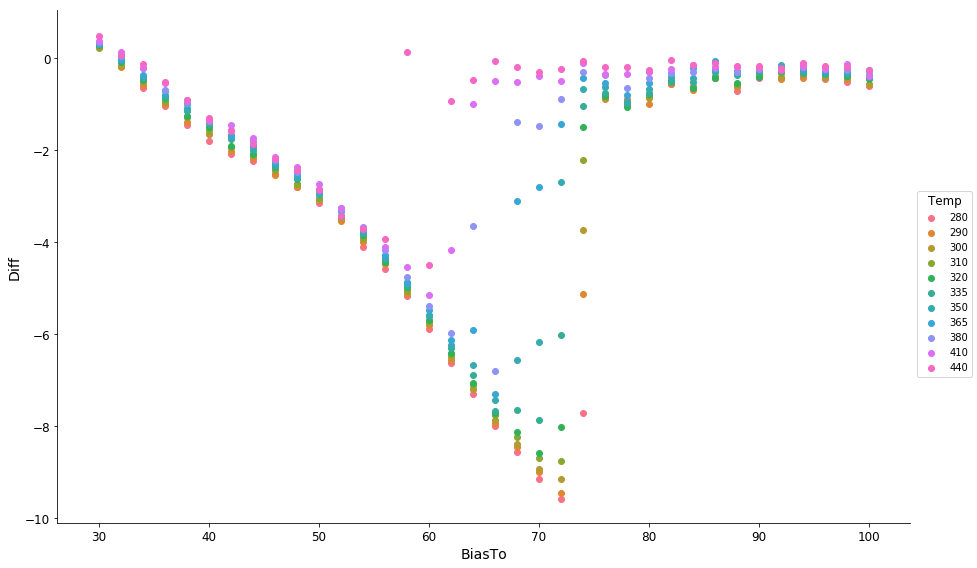

In [145]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/fourth/force_0.04_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_1_20_Apr_001224.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 450").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [35]:
rerun1.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'z_average',
       'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2', 'rg3', 'rg4',
       'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2', 'Lipid3', 'Lipid4',
       'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10', 'Lipid11',
       'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'TotalE', 'BiasTo'],
      dtype='object')

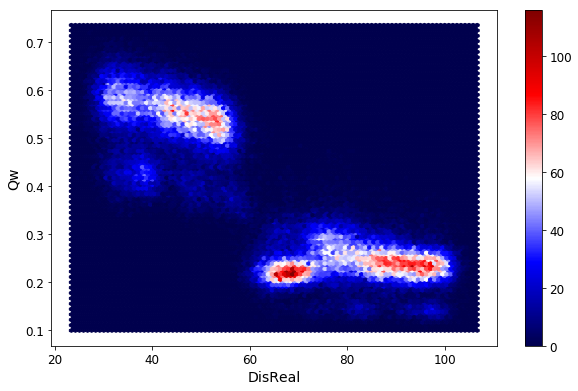

In [148]:
rerun1.query("Temp == 410").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

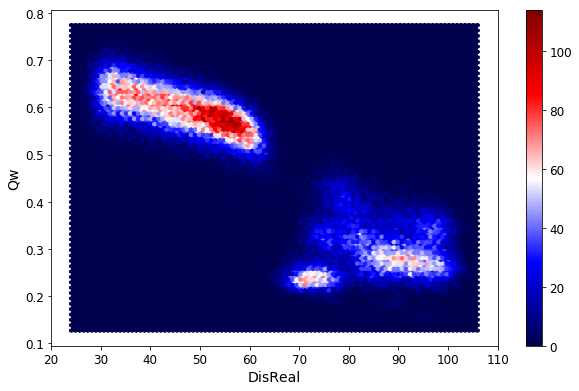

In [132]:
rerun1.query("Temp == 350").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

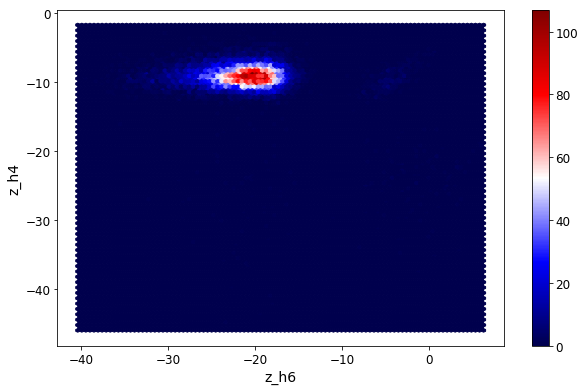

In [175]:
t = rerun1.query("Temp == 350 and Qw < 0.3 and DisReal > 80").plot.hexbin("z_h6", "z_h4", cmap="seismic", sharex=False)

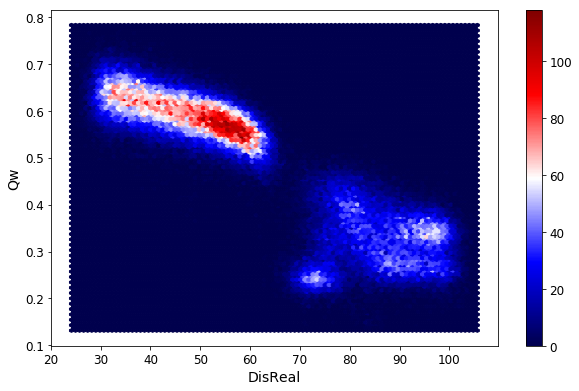

In [182]:
rerun0.query("Temp == 350").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

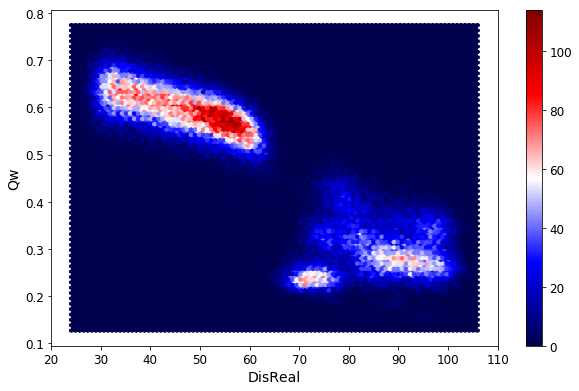

In [186]:
rerun1.query("Temp == 350").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

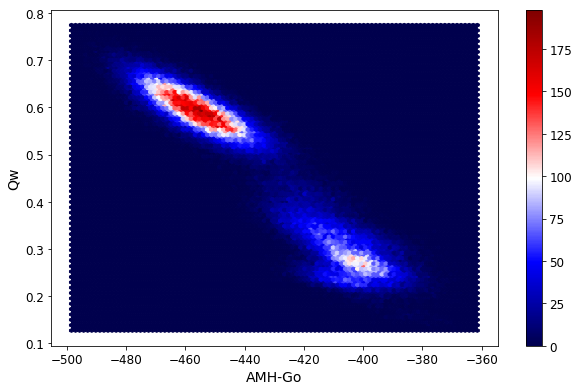

In [188]:
rerun1.query("Temp == 350").plot.hexbin("AMH-Go", "Qw", cmap="seismic", sharex=False)

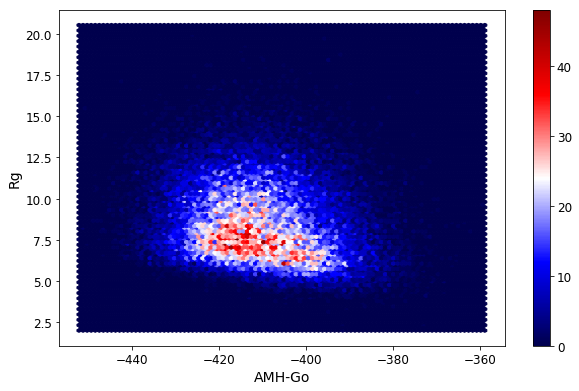

In [197]:
rerun0.query("Temp == 350 and DisReal > 70").plot.hexbin("AMH-Go", "Rg", cmap="seismic", sharex=False)

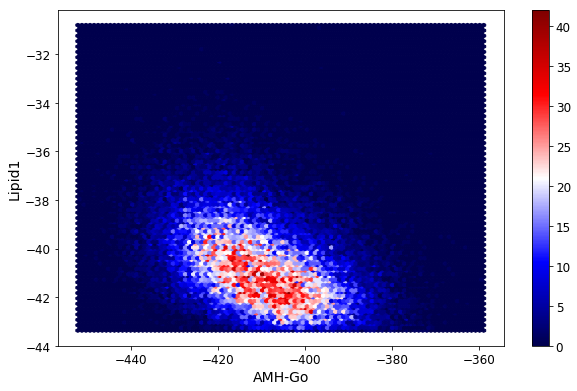

In [196]:
rerun0.query("Temp == 350 and DisReal > 70").plot.hexbin("AMH-Go", "Lipid1", cmap="seismic", sharex=False)

In [184]:
rerun0.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'z_average',
       'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2', 'rg3', 'rg4',
       'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2', 'Lipid3', 'Lipid4',
       'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10', 'Lipid11',
       'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'TotalE', 'BiasTo'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21f34198>]], dtype=object)

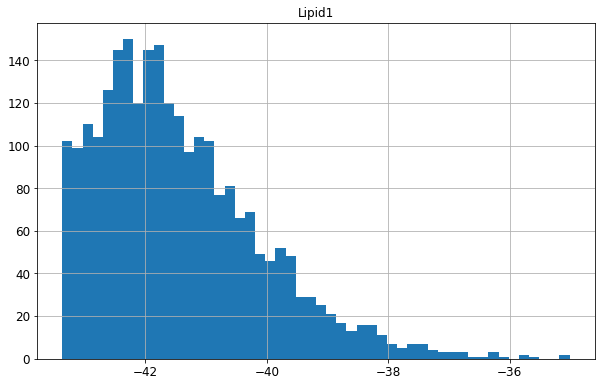

In [191]:
t.hist("Lipid1", bins=50)

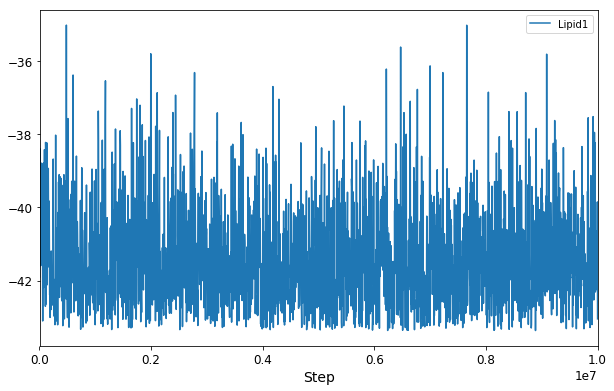

In [192]:
t = rerun0.query("BiasTo=='98.0' and Run == '0'").plot("Step", "Lipid1")

In [199]:
t = rerun1.query("Temp == 350 and DisReal > 80")
# t.plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)
t.groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 100")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                
100.0  0    236.0  99.748278  2.001669  93.289351  98.533787  99.579704   
       2    234.0  99.425793  1.941145  94.267375  98.207872  99.391083   
       3    332.0  99.639807  2.070898  93.532054  98.262460  99.567785   
       4    152.0  99.628620  1.837234  95.989571  98.169571  99.574896   
       5    262.0  99.464141  1.962675  94.204960  98.023583  99.431998   
       7    466.0  99.703890  1.921327  92.678673  98.332325  99.672319   
       8    141.0  99.478947  1.955755  93.810505  98.244368  99.541808   
       9    250.0  99.678765  2.011510  93.648888  98.297055  99.684999   
       10   220.0  99.432076  1.974972  94.397189  98.099803  99.221307   
       11   105.0  99.730452  2.251384  93.558403  98.590571  99.816052   
80.0   0    130.0  81.488669  1.214482  80.005575  80.604560  81.133099   
       5    103.0  81.456628  1.086424  80.035077  80.654107  81.159645   
       8    101.0  81.396222  0.973623  80.001402  80.476319  81.397219   
82.0   0    163.0  82.119272  1.418530  80.000380  81.083448  81.879936   
       1    306.0  82.363676  1.536804  80.026429  81.210793  82.153745   
       2    232.0  82.297247  1.475704  80.023416  80.988886  82.073309   
       4    239.0  82.378039  1.530862  80.021157  81.165360  82.230572   
       6    142.0  82.442191  1.408768  80.028441  81.330276  82.303186   
       7    181.0  82.202679  1.664079  80.000022  80.898487  81.802672   
       9    119.0  82.189214  1.481278  80.006945  81.023297  81.945907   
       10   211.0  82.349575  1.446882  80.036447  81.229237  82.203374   
       11   167.0  82.356146  1.475657  80.011772  81.238150  82.107133   
84.0   0    392.0  83.711222  1.819850  80.020819  82.488101  83.536269   
       1    261.0  83.689185  1.991990  80.063119  82.198122  83.425054   
       2    108.0  84.080730  1.849742  80.099461  82.768610  84.171036   
       4    282.0  83.540998  1.860035  80.017462  82.233830  83.448368   
       5    200.0  83.697082  1.721007  80.128214  82.465662  83.608485   
       7    153.0  83.817332  1.776912  80.320528  82.406659  83.634804   
       8    232.0  83.922653  1.821465  80.062933  82.613507  83.691830   
       9    293.0  83.770044  1.859014  80.038324  82.522297  83.763421   
...           ...        ...       ...        ...        ...        ...   
94.0   2    342.0  93.853226  1.965906  87.641067  92.531534  93.737166   
       3    392.0  93.611751  1.978180  88.468352  92.165363  93.596445   
       4    158.0  93.900963  1.750683  88.669171  92.851321  93.776980   
       5    286.0  93.708945  2.007055  88.436646  92.417981  93.792186   
       6    166.0  93.678729  1.884903  88.199635  92.282317  93.907561   
       7    178.0  93.980557  1.931841  88.752794  92.549061  94.183657   
       8    188.0  93.952543  1.973318  89.452485  92.626327  93.821288   
       10   186.0  93.524860  1.933963  85.262761  92.195158  93.768983   
96.0   0    215.0  95.638931  1.888397  89.135128  94.509669  95.629611   
       1    203.0  95.789660  1.928652  90.436318  94.219811  95.862375   
       2    192.0  95.697042  2.003067  89.781396  94.231152  95.665280   
       3    149.0  95.857770  2.047553  91.318035  94.460749  95.645094   
       4    273.0  95.845767  1.940208  90.846299  94.379451  95.800560   
       5    309.0  95.908908  1.858732  90.977395  94.509350  96.014937   
       6    257.0  95.848498  2.031837  89.878116  94.313387  95.878976   
       7    238.0  95.705409  1.974823  91.295522  94.314472  95.764350   
       8    132.0  95.629528  1.946917  90.964267  94.415550  95.657539   
       10   139.0  95.911601  1.811007  90.209395  94.878501  95.926065   
       11   315.0  95.721746  2.020691  89.311733  94.281728  95.735699   
98.0   0    281.0  97.716929  2.004715  92.530067  96.284058  97.763227   
       1    168.0  97.988035  1.92924

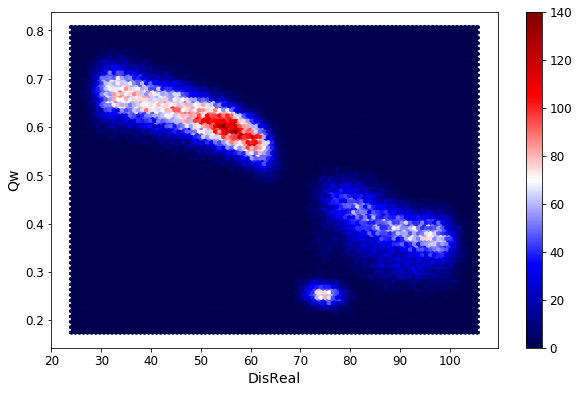

In [131]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

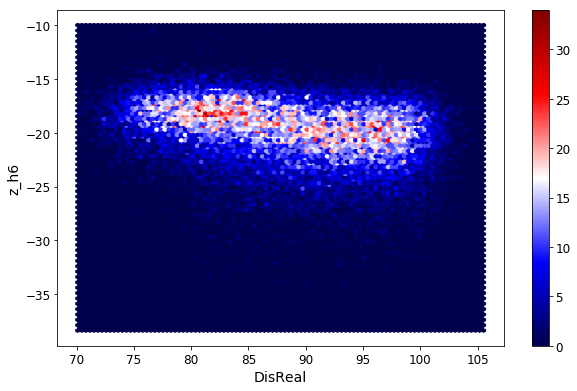

In [127]:
t = rerun1.query("Temp == 300 and DisReal > 70 and z_h6 < -10")
t.plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)
# t.mean()
# t.groupby(["BiasTo", "Run"])["TotalE"].describe().query("count > 100")

# check run 11, dis_76.

In [108]:
t = rerun1.query("BiasTo == '76.0' and Run == 11")

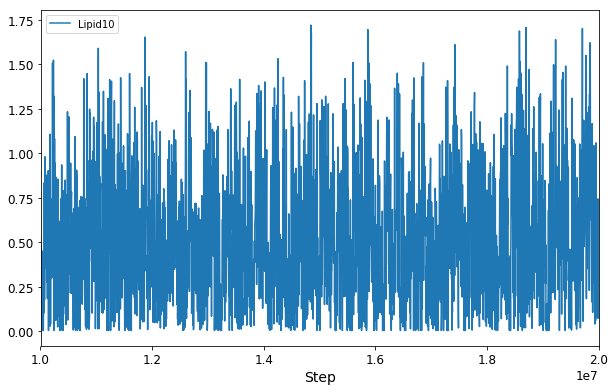

In [109]:
t.plot("Step", "Lipid10")

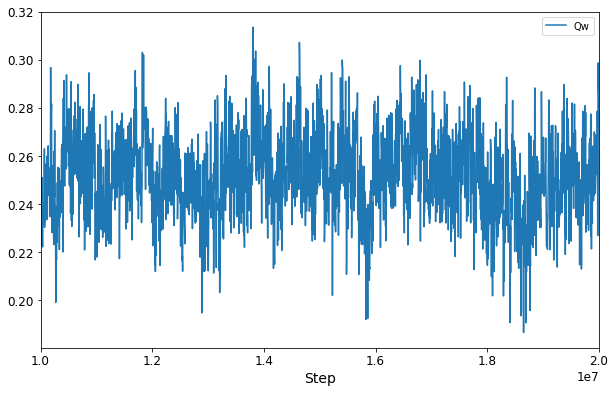

In [84]:
t.plot("Step", "Qw")

# Two state are similar energy wise

-421.6274140480737

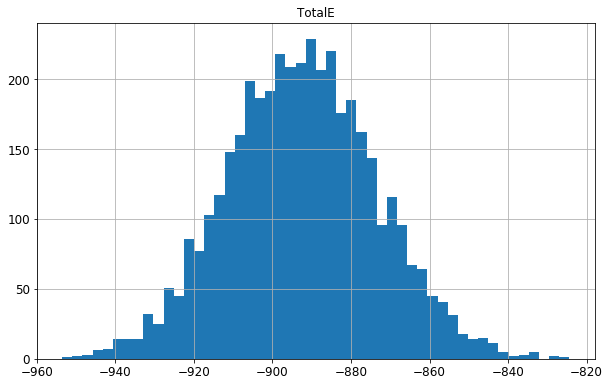

In [111]:
t = rerun1.query("Temp == 300 and DisReal > 70 and z_h6 > -10 and Qw < 0.35")
# t.plot.hexbin("DisReal", "TotalE", cmap="seismic", sharex=False)
t.hist("TotalE", bins=50)
t["TotalE"].mean()
# t.mean()
t["AMH-Go"].mean()
# t.groupby(["BiasTo", "Run"])["TotalE"].describe().query("count > 100")

-433.7705261177251

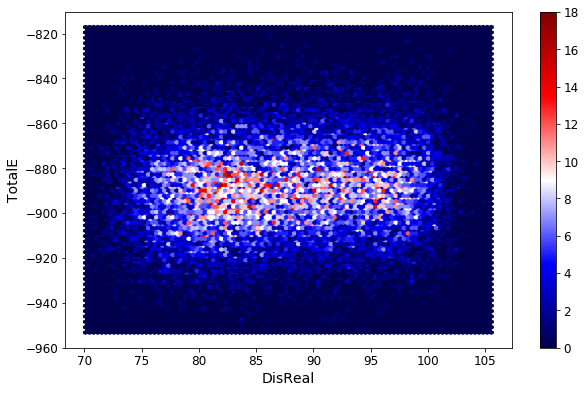

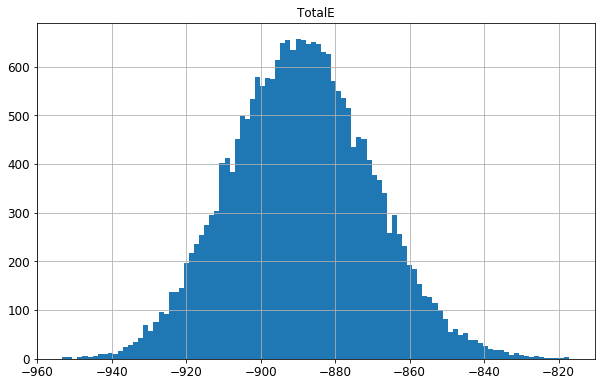

In [115]:
t = rerun1.query("Temp == 300 and DisReal > 70 and z_h6 < -10 and Qw > 0.35")
t.plot.hexbin("DisReal", "TotalE", cmap="seismic", sharex=False)
t.hist("TotalE", bins=100)
t["TotalE"].mean()
t["AMH-Go"].mean()
# t.mean()
# t.groupby(["BiasTo", "Run"])["TotalE"].describe().query("count > 100")

(1989, 43)


count      mean       std       min       25%       50%       75%  \
BiasTo Run                                                                      
74.0   3    153.0  0.257173  0.014711  0.218977  0.245756  0.258235  0.266860   
       5    166.0  0.254090  0.014398  0.213446  0.244164  0.252218  0.263386   
       9    110.0  0.254683  0.015559  0.207127  0.244790  0.254800  0.266404   
       10   200.0  0.257201  0.015775  0.213655  0.245394  0.258335  0.267594   
76.0   5    210.0  0.252722  0.015649  0.220435  0.242367  0.251920  0.261208   
       7    336.0  0.253253  0.015453  0.204831  0.242601  0.252057  0.262831   
78.0   0    190.0  0.249693  0.041496  0.191180  0.231488  0.242453  0.256652   
       1    218.0  0.254934  0.022388  0.217065  0.243336  0.252560  0.263680   
80.0   3    177.0  0.245409  0.027432  0.210091  0.235992  0.243159  0.252244   

                 max  
BiasTo Run            
74.0   3    0.290964  
       5    0.291127  
       9    0.283658  
       10   0.297403  
76.0   5    0.310943  
       7    0.305902  
78.0   0    0.542488  
       1    0.470777  
80.0   3    0.554859

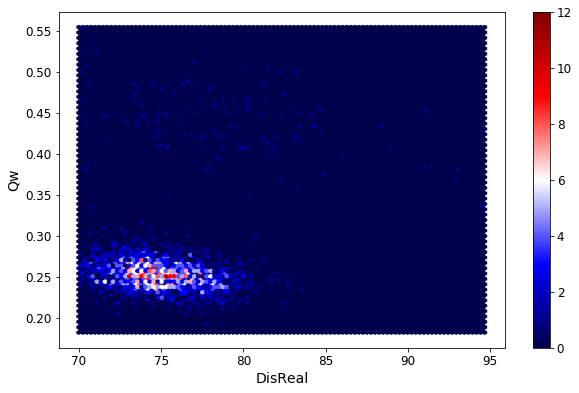

In [113]:
t = rerun0.query("Temp == 300 and DisReal > 70 and z_h6 > -10")
t.plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)
print(t.shape)
t.groupby(["BiasTo", "Run"])["Qw"].describe().query("count > 50")

(4164, 43)


count      mean       std       min       25%       50%       75%  \
BiasTo Run                                                                      
74.0   3    250.0  0.256702  0.017841  0.200718  0.246328  0.255917  0.265662   
       5    349.0  0.255141  0.014748  0.221380  0.245327  0.254024  0.265113   
       9    391.0  0.255678  0.015723  0.211991  0.245248  0.255209  0.266482   
       10   319.0  0.256427  0.014370  0.223025  0.246350  0.255328  0.267320   
76.0   5    329.0  0.254016  0.016608  0.212582  0.242237  0.253556  0.264144   
       7    348.0  0.256630  0.015062  0.220253  0.246504  0.255476  0.267056   
       11   395.0  0.254449  0.015331  0.212791  0.243958  0.254120  0.264375   
78.0   0    306.0  0.253157  0.014413  0.209317  0.243295  0.253105  0.262710   
       1    297.0  0.250220  0.024535  0.193917  0.233951  0.251027  0.264496   
       3    192.0  0.243962  0.015938  0.214576  0.233102  0.241955  0.253712   
       10   361.0  0.253276  0.014735  0.216421  0.242084  0.252660  0.263188   
80.0   7    375.0  0.254054  0.016969  0.212829  0.242505  0.252240  0.264107   

                 max  
BiasTo Run            
74.0   3    0.331629  
       5    0.302110  
       9    0.310412  
       10   0.298841  
76.0   5    0.309854  
       7    0.299896  
       11   0.302522  
78.0   0    0.294116  
       1    0.324166  
       3    0.287055  
       10   0.298427  
80.0   7    0.321972

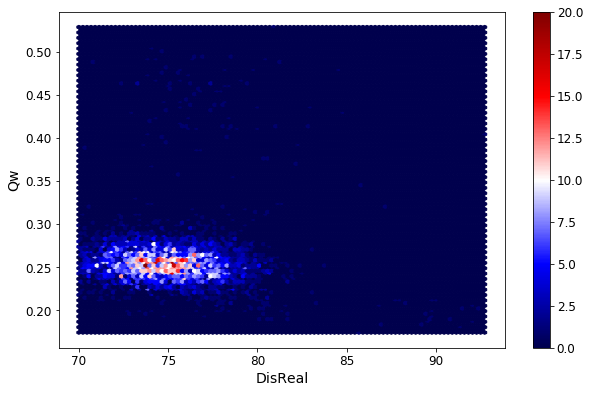

In [116]:
t = rerun1.query("Temp == 300 and DisReal > 70 and z_h6 > -10")
t.plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)
print(t.shape)
t.groupby(["BiasTo", "Run"])["Qw"].describe().query("count > 50")

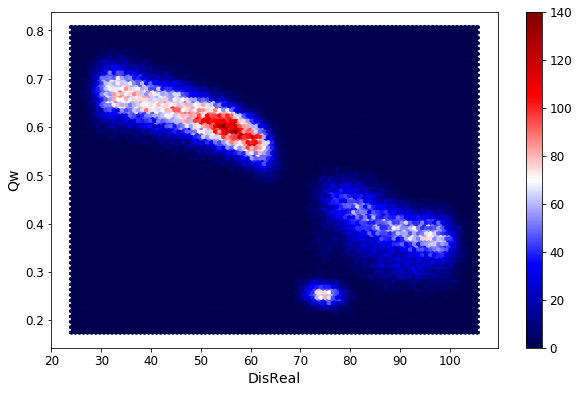

In [16]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

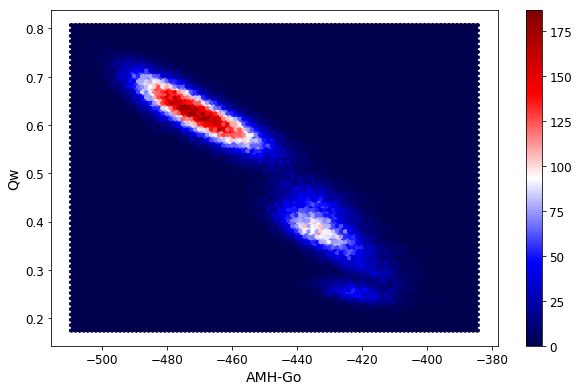

In [168]:
rerun1.query("Temp == 300").plot.hexbin("AMH-Go", "Qw", cmap="seismic", sharex=False)

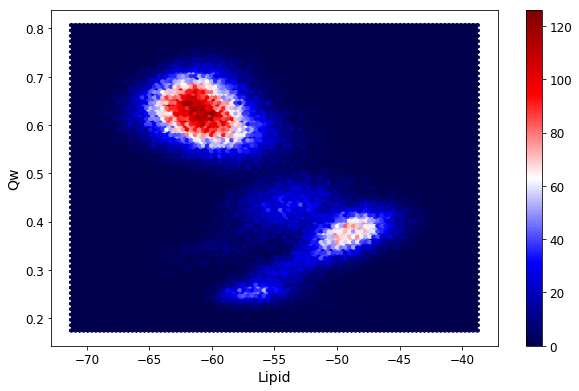

In [170]:
rerun1.query("Temp == 300").plot.hexbin("Lipid", "Qw", cmap="seismic", sharex=False)

In [169]:
rerun1.columnsumns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'z_average',
       'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2', 'rg3', 'rg4',
       'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2', 'Lipid3', 'Lipid4',
       'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10', 'Lipid11',
       'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'TotalE', 'BiasTo'],
      dtype='object')

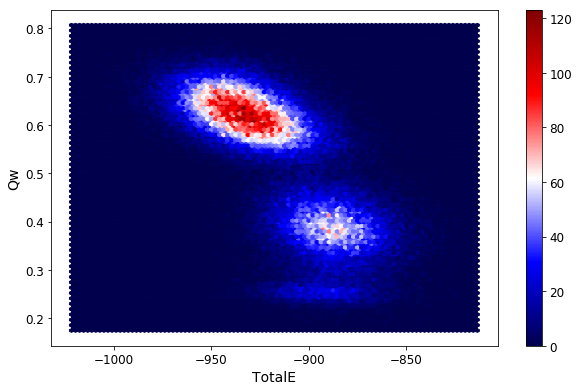

In [167]:
rerun1.query("Temp == 300").plot.hexbin("TotalE", "Qw", cmap="seismic", sharex=False)

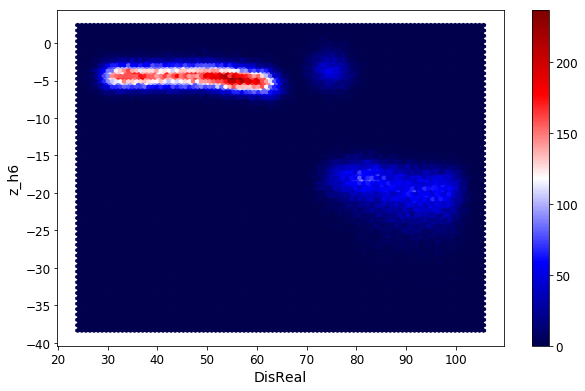

In [17]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

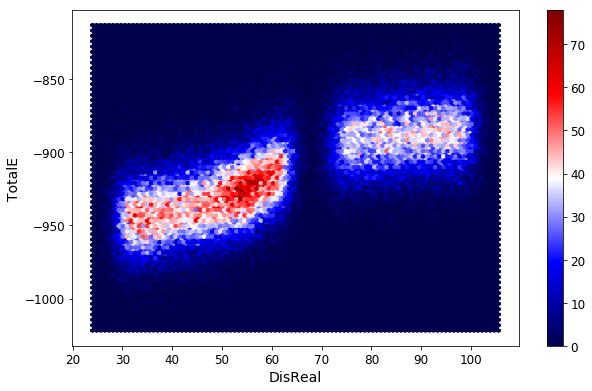

In [23]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "TotalE", cmap="seismic", sharex=False)

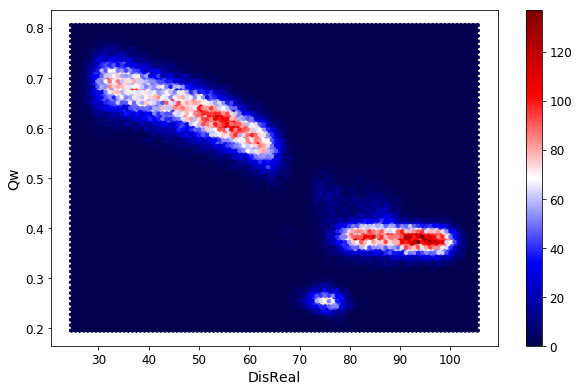

In [5]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

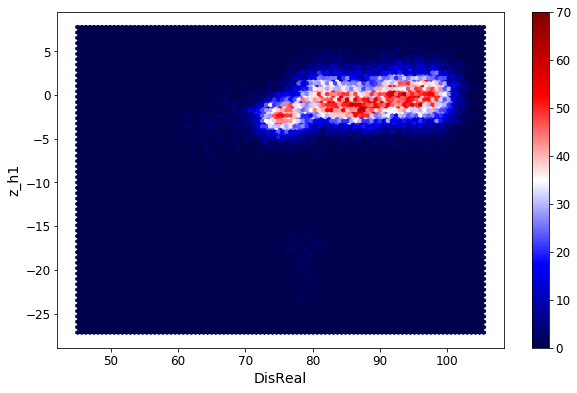

In [13]:
rerun1.query("Temp == 300 and Qw < 0.5").plot.hexbin("DisReal", "z_h1", cmap="seismic", sharex=False)

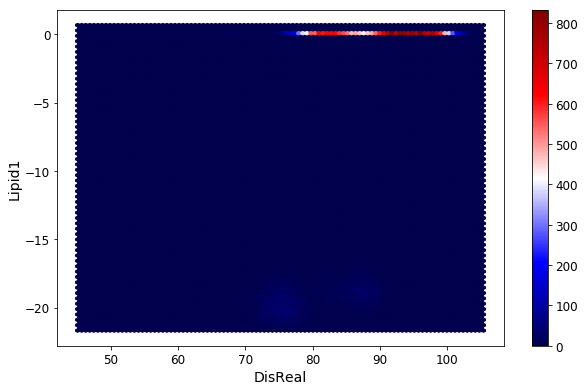

In [9]:
rerun1.query("Temp == 300 and Qw < 0.5").plot.hexbin("DisReal", "Lipid1", cmap="seismic", sharex=False)

In [ ]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 400
location = pre + "/fourth/_280-350/2d_z_qw/k_0.2_force_0.2_temp410/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=150)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

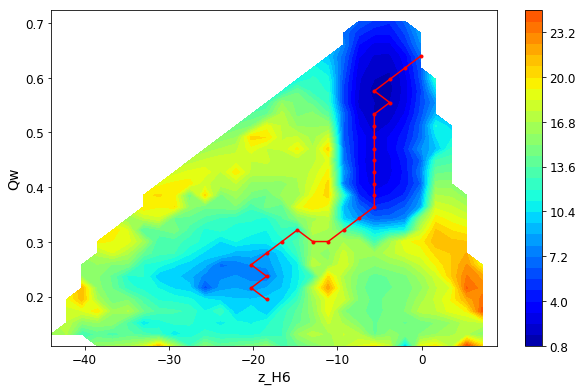

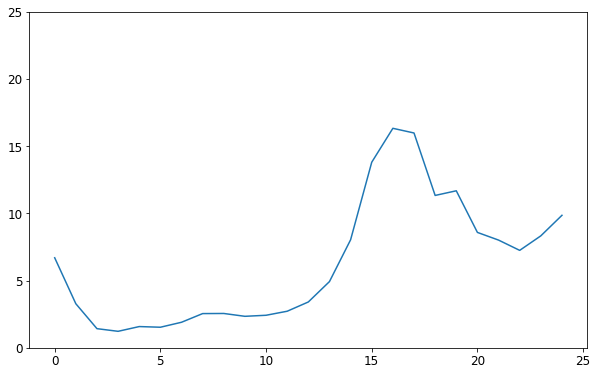

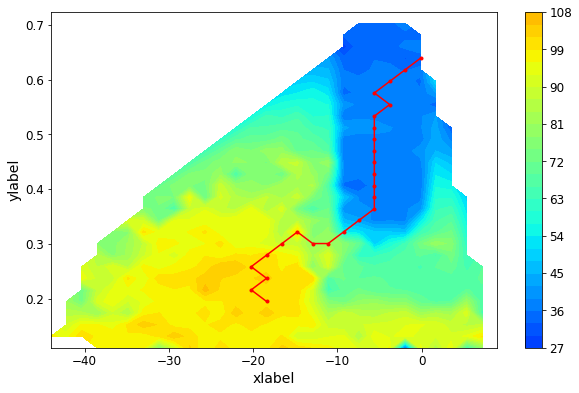

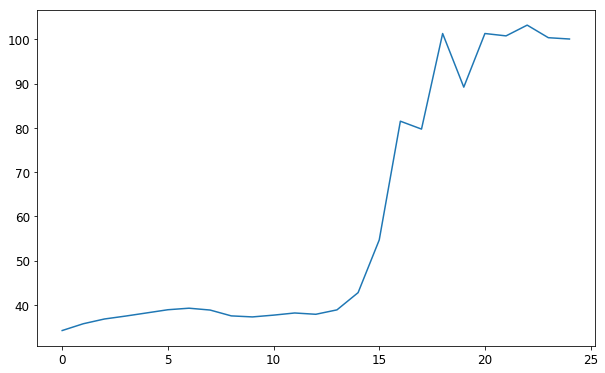

In [150]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 400
location = pre + "/fourth/_280-350/2d_z_qw/k_0.2_force_0.2_temp410/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=150)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

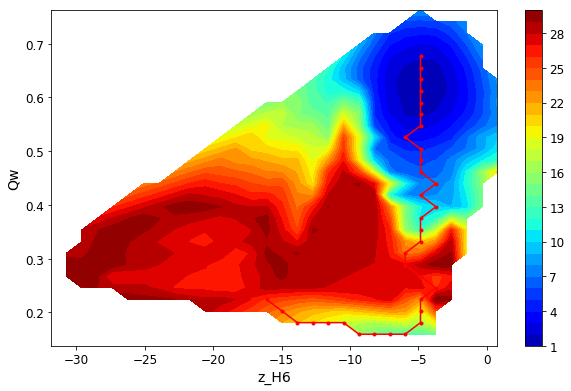

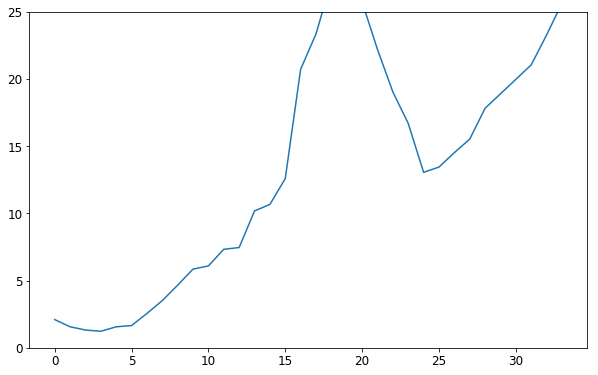

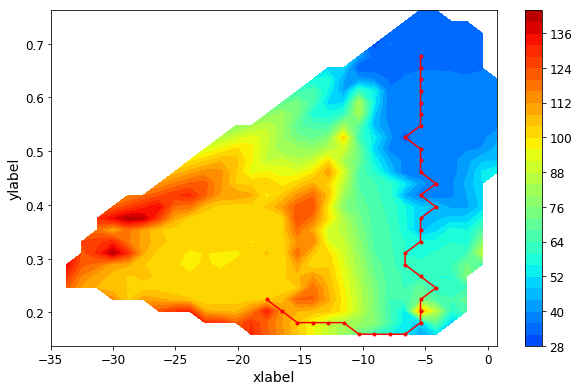

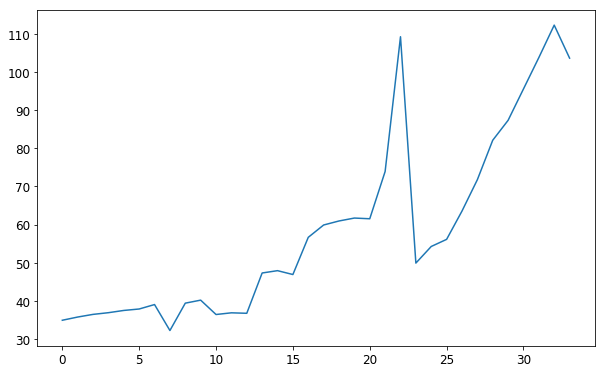

In [144]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 350
location = pre + "/fourth/_280-350/2d_z_qw/k_0.2_force_0.2_temp350/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=150)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

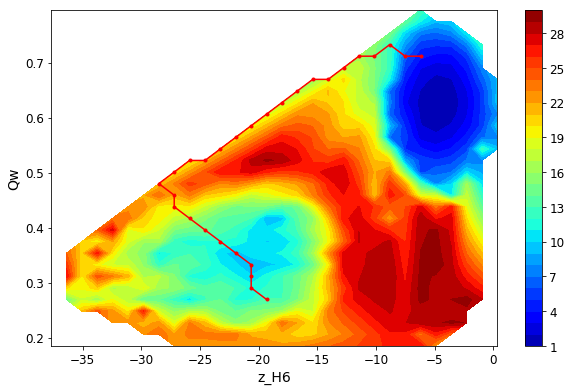

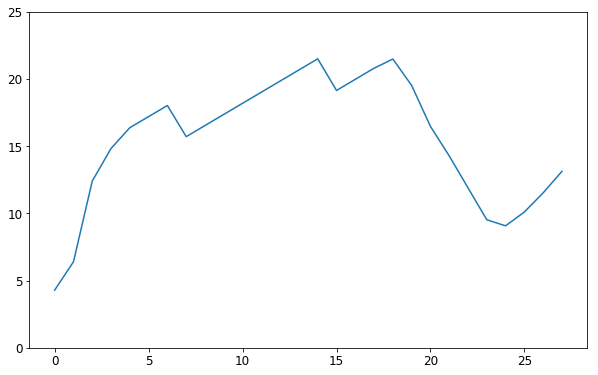

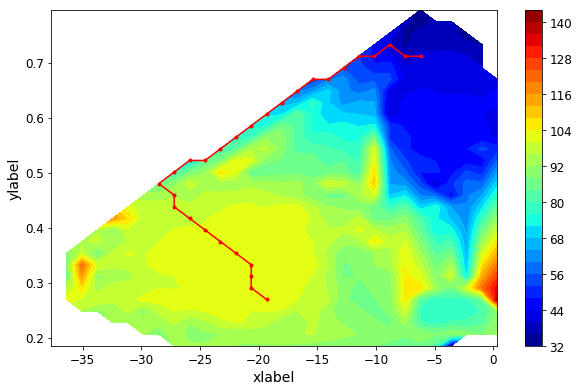

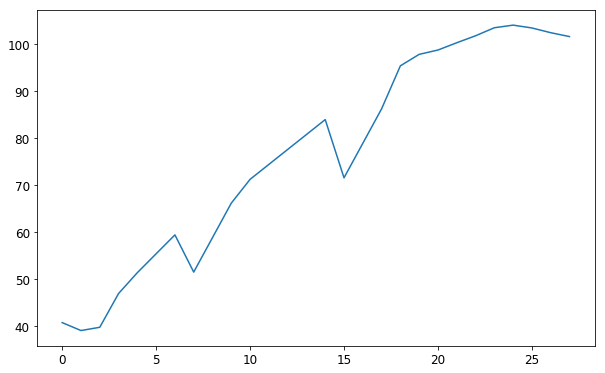

In [155]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 310
location = pre + "/fourth/_280-350/2d_z_qw/k_0.2_force_0.5/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=150)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

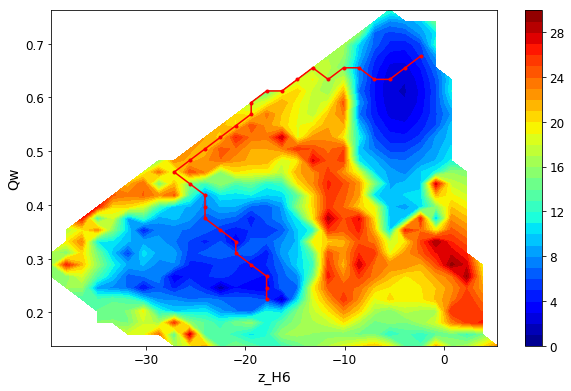

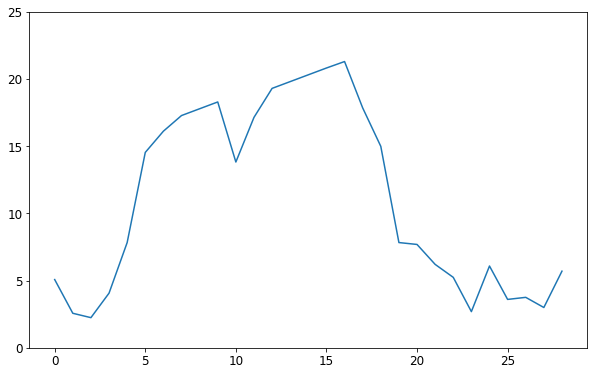

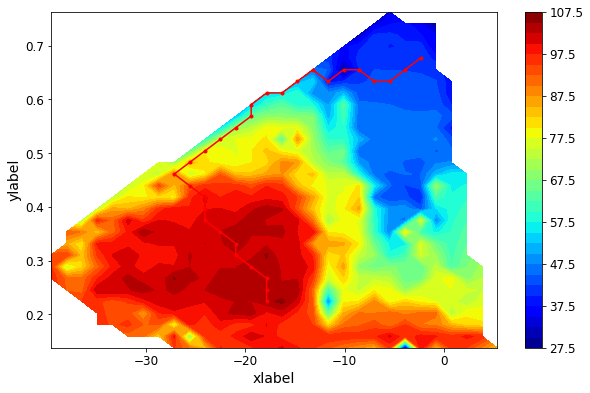

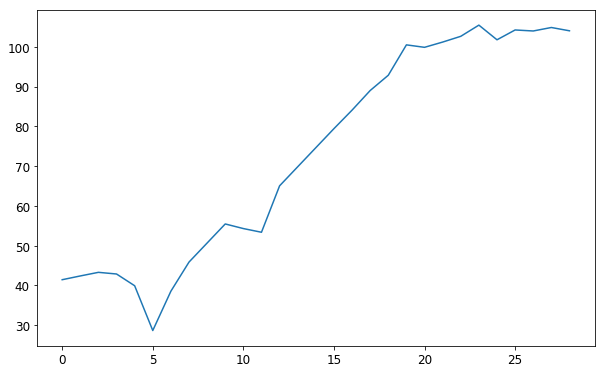

In [162]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 340
location = pre + "/fourth/_280-350/2d_z_qw/k_0.2_force_0.5_temp350/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=150)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

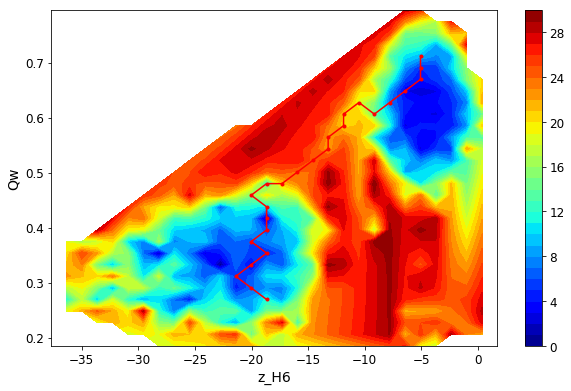

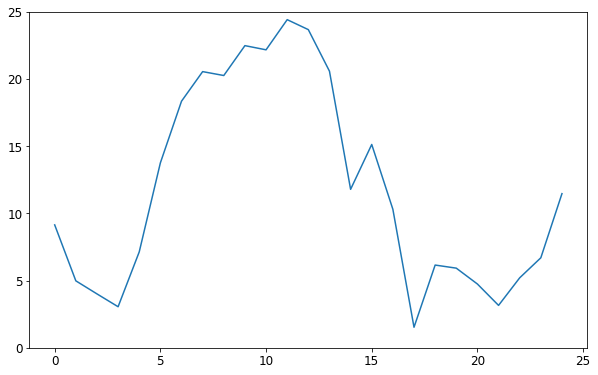

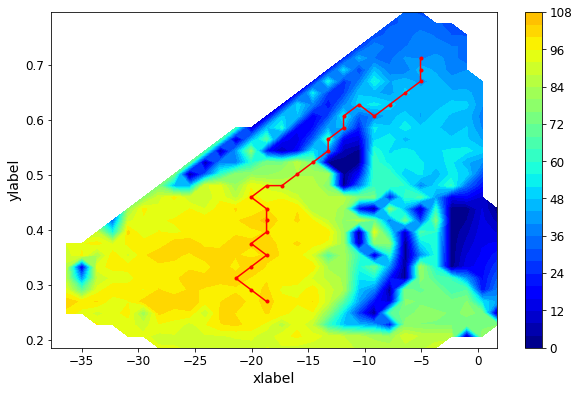

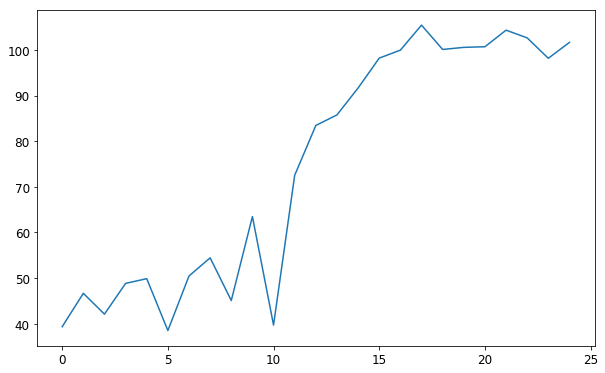

In [143]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 350
location = pre + "/fourth/_280-350/2d_z_qw/k_0.2_force_0.5/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=150)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

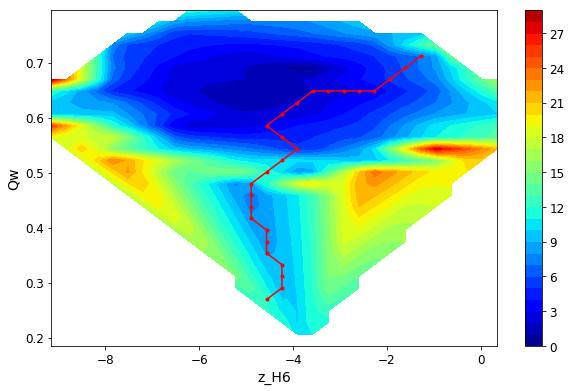

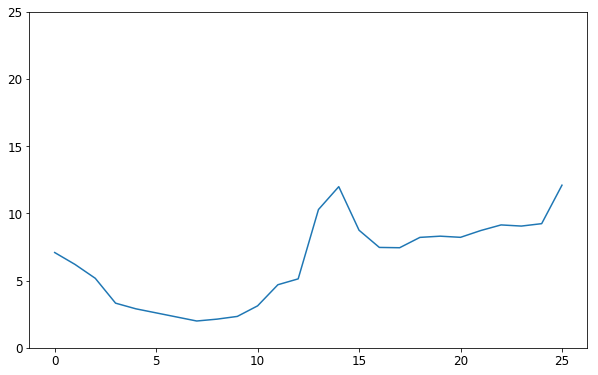

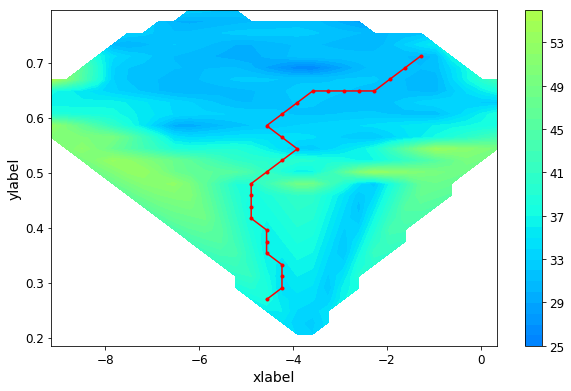

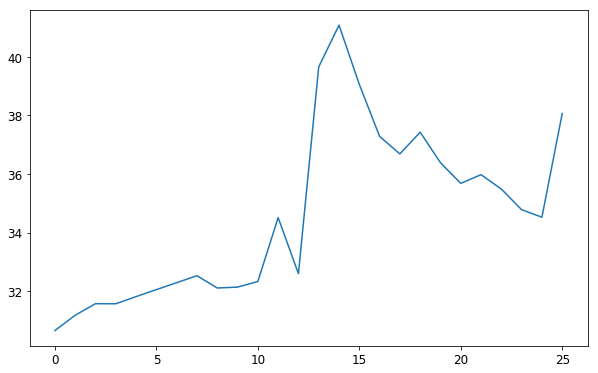

In [130]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 320
location = pre + "/fourth/_280-350/2d_z_qw/k_0.2_force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

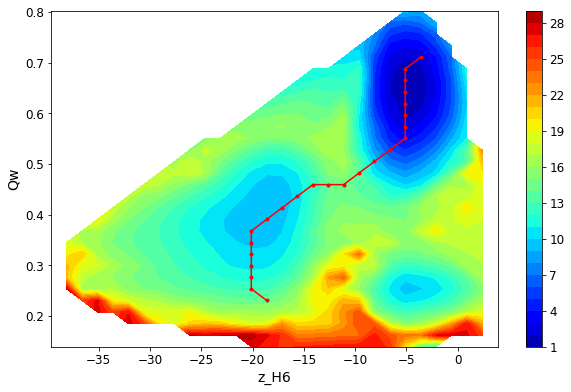

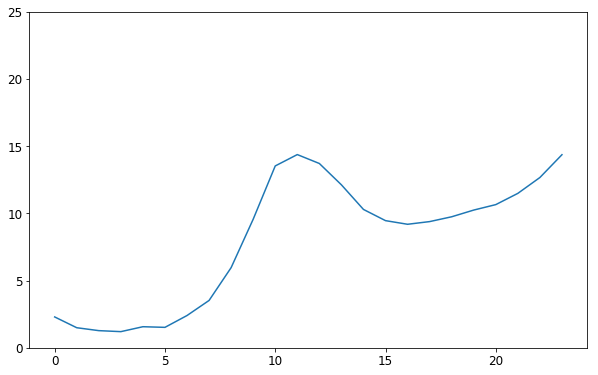

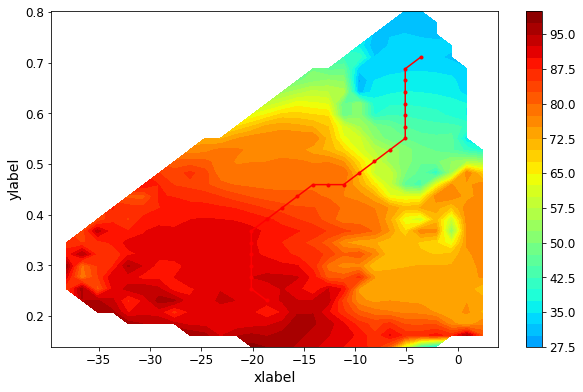

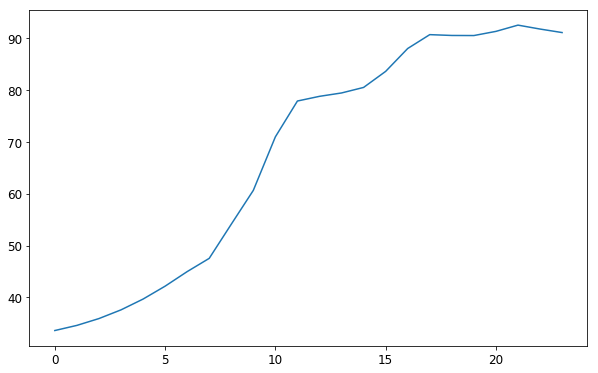

In [128]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 300
location = pre + "/fourth/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

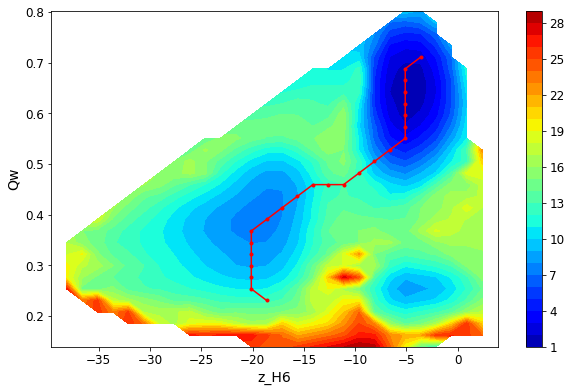

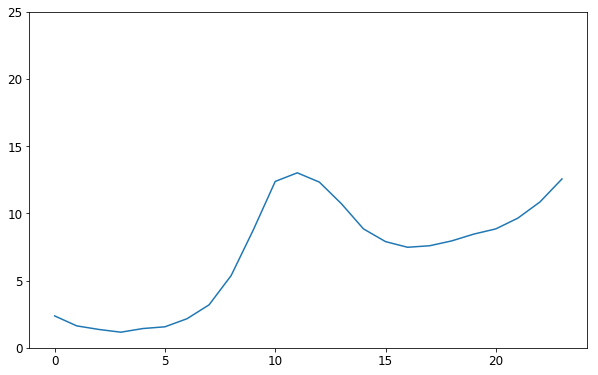

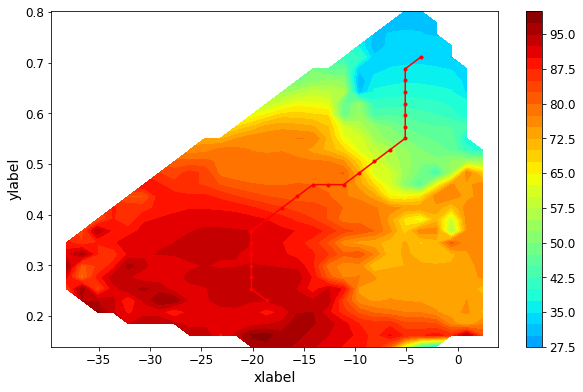

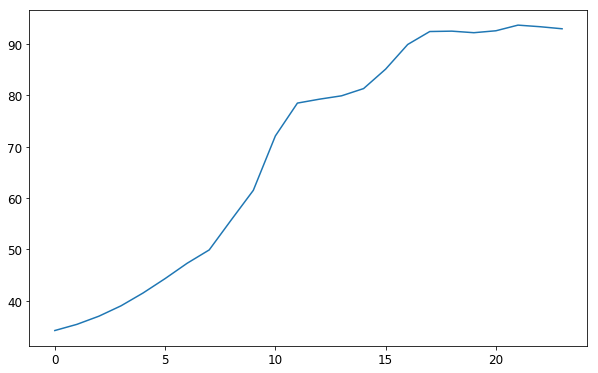

In [33]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 300
location = pre + "/fourth/_280-350/2d_z_qw/force_0.02/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

# Make sure new lipid is correct

## seems ok~

In [95]:
pre =  "/Users/weilu/Research/server/apr_2018/sixth/rg_0.15_lipid_1.0_mem_1_go_0.8/simulation/dis_32.0/1/DMPC_0/"
new = pd.read_csv(pre+"lipid.dat")
new.columns = new.columns.str.strip()

In [94]:
pre =  "/Users/weilu/Research/server/apr_2018/sixth/rg_0.15_lipid_1.0_mem_1_go_0.8/simulation/dis_32.0/1/original_0/"
old = pd.read_csv(pre+"lipid.dat")
old.columns = old.columns.str.strip()

In [99]:
new["Lipid"].head()

0   -25.497257
1   -24.513594
2   -24.725570
3   -27.114650
4   -29.818947
Name: Lipid, dtype: float64

In [104]:
new.mean()

Steps      3.000200e+07
Lipid     -2.499478e+01
Lipid1    -3.342558e+00
Lipid2    -2.701749e+00
Lipid3     6.749951e-01
Lipid4     1.090353e+00
Lipid5     1.370368e+00
Lipid6    -1.264184e+00
Lipid7    -3.509540e+00
Lipid8    -2.708757e+00
Lipid9     7.981707e-02
Lipid10   -2.741665e+00
Lipid11    7.229237e-01
Lipid12   -4.018974e+00
Lipid13   -3.321257e+00
Lipid14   -4.194385e+00
Lipid15   -1.130163e+00
dtype: float64

In [105]:
old.mean()

Steps      3.000200e+07
Lipid     -2.741318e+01
Lipid1    -3.522936e+00
Lipid2    -2.868923e+00
Lipid3     5.460409e-01
Lipid4     9.624254e-01
Lipid5     1.244833e+00
Lipid6    -1.411097e+00
Lipid7    -3.692674e+00
Lipid8    -2.876547e+00
Lipid9    -5.641252e-02
Lipid10   -2.905453e+00
Lipid11    5.903865e-01
Lipid12   -4.225071e+00
Lipid13   -3.499094e+00
Lipid14   -4.422016e+00
Lipid15   -1.276637e+00
dtype: float64

In [106]:
new.mean() - old.mean()

Steps      0.000000
Lipid      2.418401
Lipid1     0.180378
Lipid2     0.167175
Lipid3     0.128954
Lipid4     0.127927
Lipid5     0.125535
Lipid6     0.146914
Lipid7     0.183134
Lipid8     0.167790
Lipid9     0.136230
Lipid10    0.163788
Lipid11    0.132537
Lipid12    0.206098
Lipid13    0.177837
Lipid14    0.227631
Lipid15    0.146474
dtype: float64

In [100]:
old["Lipid"].head()

0   -27.923850
1   -26.887496
2   -27.124176
3   -29.555065
4   -32.341030
Name: Lipid, dtype: float64

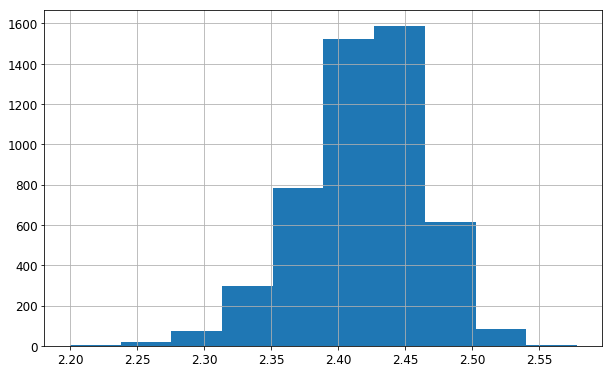

In [98]:
(new["Lipid"] - old["Lipid"]).hist()

In [101]:
-3.98164e-6*5

-1.99082e-05

In [102]:
6.21541e-4*4

0.002486164

In [103]:
-3.5558475e-2*3

-0.10667542499999999